In [1]:
import numpy as np
from sklearn import datasets, metrics
import matplotlib.pyplot as plt

%matplotlib inline

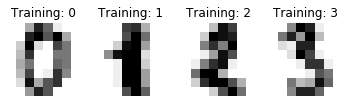

In [2]:
"""
Loading MNIST taken from:
https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html
"""

# MNIST dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
train_frac = 0.8
n_train = int(train_frac * n_samples)
n_test = n_samples - n_train

x = digits.images.reshape((n_samples, -1))
y = digits.target
x_train = x[:n_train]
y_train = y[:n_train]
x_test = x[n_train:]
y_test = y[n_train:]

In [3]:
def knn_model(x_train, x_test, y_train, k):
    y_train = y_train.flatten()
    def sq_dist(A, B):
        return (
            (A ** 2).sum(-1, keepdims=True)
            + (B ** 2).sum(-1, keepdims=True).T
            - 2 * (A @ B.T)
        )
    test_train_dists = sq_dist(x_test, x_train)
    knn = np.argsort(test_train_dists, axis=1)[:, :k]
    # can compute distances if needed (e.g. for kernelized knn)
    # rows = np.arange(len(x_test))[:, np.newaxis]
    # dists = test_train_dists[rows, knn]
    knn_labels = y_train[knn]
    
    # We take the mode for classification
    from scipy.stats import mode
    y_pred = mode(knn_labels, axis=1).mode.flatten()
    
    return y_pred

In [4]:
y_pred = knn_model(x_train, x_test, y_train, 1)

In [7]:
print(f"{metrics.classification_report(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.92      1.00      0.96        36
           2       1.00      1.00      1.00        35
           3       0.97      0.84      0.90        37
           4       1.00      0.92      0.96        37
           5       0.90      1.00      0.95        37
           6       1.00      1.00      1.00        37
           7       0.97      1.00      0.99        36
           8       0.94      0.88      0.91        33
           9       0.87      0.92      0.89        37

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

